# Supervised learning and Linear models
I will cite external resources, Deakin resources will not be cited.

## Week 5: Fundamentals of supervised learning

### 5.1 Regression

#### 5.1.1 Concept
The information below is from the Machine Learning Specialization (Ng, A., n.d.) course.

Linear regression maps input data $\mathbf{x}$ to labelled data $\mathbf{y}$. The formula is:
$$
f_{\mathbf{w}, b}(\mathbf{x}) = \mathbf{w}\mathbf{x} + b
$$

Our goal is the find the best $w$ weights and $b$ bias. 

The cost function $J(\mathbf{w},b)$ will help use choose the best weights and bias. To find the smallest cost, we need **gradient descent**. 

Note: $\mathbf{w}$ is a vector or column matrix $\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}$ and $b$ is a scalar.

##### Gradient Descent
The cost function formula is
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})^2 = J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b - \mathbf{y}^{(i)})^2$$

where $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalar or float to support multiple features; $m$ is the number of training data.

Before I introduced to gradient descent, we need to compute the gradient, which is the final form of the partial derivative of weights and bias.
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\mathbf{x}^{(i) \times} {\mathbf{w}} + b - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\mathbf{x}^{(i)} \times {\mathbf{w}} + b - y^{(i)})
\end{align}
$$
* $m$ is the number of training examples in the data set
* $\mathbf{w}$ is weight vector
* $\mathbf{x}^{(i)}$ and $\mathbf{y}^{(i)}$ are vectors as well

So here is the formula for gradient descent
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where $\alpha$ is the learning rate, determining how fast the gradient descent converge, or find the optimal parameters. We don't want to set it too high or too small, coz the model might not converge and converge very slowly (Ng, A., n.d.).

#### 5.1.2 Metrics

##### Mean Square Error
This metric measures how close the predictions are to the true target values. Mean Square Error or MSE formula is:
$$
MSE = \frac{1}{n}\sum_{i=1}^n(\mathbf{y}_i - \mathbf{\hat{y}}_i)^2
$$

In [53]:
def mse(predictions: np.ndarray, target_values: np.ndarray) -> float:
    """
    Calculate the MSE between predictions and target values

    Args:
        prediction (np.ndarray): _description_
        target_value (np.ndarray): _description_
        
    Returns:
    float: mse
    """
    mse = np.mean((predictions - target_values)**2)/len(predictions)
    return mse

mean_square_error = mse(result_df['prediction'], result_df['target_value'])
mean_square_error

0.014776657456842828

In [48]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


So the Sales is in the range of 1.6 to 27 (measures thousands of units), with an std of 5.28. The mse (the average of the squared difference between the actual and predicted sales) of our model is 0.01477. This means that the mse is relatively small compared to the overall variance in the sales.

##### RMSE (Root Mean Square Error)
Root Mean Square Error derive from MSE and its computed as:
$$
RMSE = \sqrt{MSE}
$$

In [55]:
rmse = np.sqrt(mean_square_error)
rmse

0.12155927548666465

RMSE of 0.12 shows on average, the model's predictions are off by 1.12 thousand units in sales.

##### MAE (Mean Absolute Error)
Mean Absolute Error is similar to MSE and RMSE, a popular metric that is robust to outliers. The formula is
$$
MAE = \frac{1}{n}\sum_{i=1}^n|\mathbf{y}_i - \mathbf{\hat{y}}_i|
$$

In [58]:
def mae(predictions: np.ndarray, target_values: np.ndarray) -> float:
    """
    Calculate the MSE between predictions and target values

    Args:
        prediction (np.ndarray): _description_
        target_value (np.ndarray): _description_
        
    Returns:
    float: mae
    """
    mae = (1/len(predictions)) * np.sum((predictions - target_values))
    return mae
     
    
mae(result_df['prediction'], result_df['target_value'])

0.01655921894249485

0.02 MAE, very small, which shows our model is performing very well.

##### Explained Variance ($R^2$)
Explained Variance, R-square, the coefficient of determination, is just the measure of the percentage of target variation that is explained by the model. In other words, it is the square correlation between the target values and the predicted target values.
$$
R^2 = \frac{\text{Variance Explained by the model}}{\text{Total Variance}}
$$
Unlike the other metrics, the higher the $R^2$, the better the model performance.

In [59]:
def r_squared(predictions: np.ndarray, target_values: np.ndarray) -> float:
    """
    Calculate the R-squared between predictions and target values.

    Args:
        predictions (np.ndarray): Predicted values.
        target_values (np.ndarray): Actual target values.
        
    Returns:
    float: R-squared value.
    """
    ss_total = np.sum((target_values - np.mean(target_value))**2)
    ss_residual = np.sum((target_values - predictions)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

r_squared(result_df['prediction'], result_df['target_value'])

0.9231773833754602

Our model gives a $R^2$ value of 0.923 which is very high.

### 5.2 Classification
Classification is similar to regression, but instead of predicting continuous data, it predict discrete data.

There are 2 types of classification: binary and multi-class. In binary classification, we introduce a function called sigmoid function. The formula for sigmoid function is
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
The formula is not much different from regression formula, with the addition of $g$ which is the sigmoid function. The point of the sigmoid function is to transform the continuous output in a range between 0 and 1. The sigmoid function is defined as:
$$g(\mathbf{w}\cdot \mathbf{x} + b) = g(z) = \frac{1}{1+e^{-z}}$$

The cost function for binary classification is called log-loss, unlike square error from regression. It is defined as:
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$
where
- $m$ is the number of training data
- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ or $loss(-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$ is the cost for a single data point.
    - Recall that $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is $g(z)$ or model's prediction, and $y^{(i)}$ is the labels.

Just remember that lower log loss means the model performs better.

The iteration of gradient descent is similar to Linear Regression. The output of Logistic Regression is in probability, we can set if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$, if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$.

#### 5.2.2 Metrics

##### Confusion matrix
Confusion matrix summarizes the prediction results via the number of correct and incorrect predictions with count values of each class.

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[116,   9],
       [ 26,  41]], dtype=int64)

Confusion matrix provides real performance of a classifier because it shows us the correct and incorrect count values of each label, meaning if our dataset is unbalanced, we will know that, unlike with accuracy where we do not know whether our data is unbalanced or not.

Here is what the output mean:
- The <span style="color:red">diagonal values</span> represent the elements where the **predicted classes** = **actual classes**.
- The <span style="color:red">off-diagonal values</span> represent wrong predictions.

![picture](1.png){width=550 height=300}

This picture shows the concept clearly, with **positive class** as **class 1** and **negative class** as **class 0**. There a few formulas derived from this.

- **Accuracy**: like I said already, accuracy is not useful for imbalance class problems, and we may need to use other metrics, but its a start.
$$
\text{accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$

- **True Positive Rate** (TPR) or Recall or Sensitivity: correctly predicted positive. In other words, the fraction of TP over amount of positive samples (TP + FN).
$$
\text{recall} = \frac{TP}{TP + FN}
$$

- **False positive rate** (FPR): wrongly predicted positive. In other words, the fraction of FP over the amount of negative sample (FP + TN).
$$
\text{FPR} = \frac{FP}{FP + TN}
$$

An article on DataCamp from Navlani, A. (2019) provides us with more metrics.

- **Precision**: ratio of correctly predicted positive or TP over the total predicted positives (TP + FP).
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **F1**: combine precision and recall into a single metric, useful when class distribution is imbalanced. 
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Support**: the number of actual occurrences of each class in the dataset.

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['no diabetes', 'diabetes']))

              precision    recall  f1-score   support

 no diabetes       0.82      0.93      0.87       125
    diabetes       0.82      0.61      0.70        67

    accuracy                           0.82       192
   macro avg       0.82      0.77      0.78       192
weighted avg       0.82      0.82      0.81       192



This shows us that 
- The model perform well with 0.82 accuracy.
- The model does better at predicting "no diabetes" (high recall of 0.93) compare to "diabetes" cases (lower recall of 0.61).
- F1-score of 0.7 for "diabetes" meaning the model performance for this label is weaker, which can be a concern if correctly identifying diabetes is crucial.

##### ROC curve
Receiver Operating Characteristic (ROC) curve is a plot that plot the TPR again the FPR. It shows us the trade-offs between benefits (TP) and costs (FP). This depends on the problem we are trying to solve, like how much can we afford FPR (Navlani, 2019).

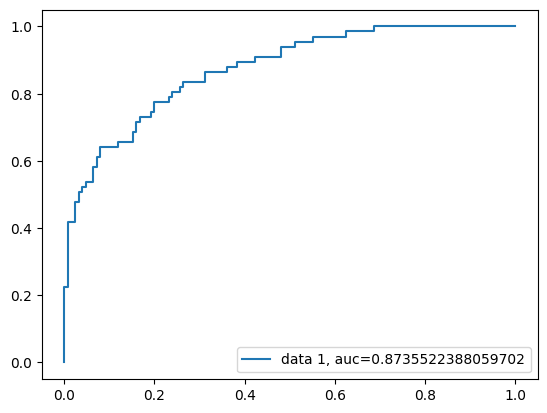

In [150]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An auc score of 0.874 out of 1 indicate a good performance. If an auc score is 0.5, meaning it is no different from random guessing.

### 5.3 Partitioning the data 
There are limitation of only using 1 single training set, here are 3 better ways to split our data.

#### Sub-sampling
Random sub-sampling repeatedly partitions the data into random training and test sets in a specified ratio.

![picture](2.png){width=550 height=300}

The figure shows us that we train the model with each training set and estimate the accuracy using the corresponding test set. Finally, we average the accuracies to get an averaged estimate.

#### Stratified Sampling
A splitting technique that ensures each class (or stratum) in the dataset is proportionate in both training and testing sets. In other words, the distribution of classes in training and testing sets mirrors the distribution of the original dataset. This technique is useful in imbalanced dataset. 

![picture](3.png){width=550 height=300}

#### Cross-validation
Cross-validation is one of the most popular splitting technique. The core idea is to partition the data into $k$ equal sized sub-samples. It is an iterative process where we leave one sub-sample out for the test set, and train on the rest of the sub-samples. 

![picture](4.png){width=550 height=300}

The picture shows us that we divide our data into 5 partitions. The first iteration trains on $s_2, s_3, s_4, s_5$ and test on $s_1$. The second iteration trains on $s_1, s_3, s_4, s_5$ and test on $s_2$. The same goes for 3 other iterations. After 5 iterations is completed, we take the average accuracy of the 5 times we test. 

### 5.4 Finding the best hyperparameters
![picture](5.png){width=550 height=400}

The validation set is used to evaluate the given model and help fine-tune the model hyperparameters. The validation part is part of the training process, there are $3$ methods that automatically split our training data further into training data to train the given model, and validating data to validate and help choose the best hyperparmeters. 

Note that the following methods can include internal cross-validation. Instead of train/test cross-validate, we cross-validate the train/validate set.  

#### Exhaustive Search Methods
- **Grid Search**: the possible values of hyperparameters are defined in a few sets. These sets are then combined bia Cartesian product to form a multidimensional grid. Then we will try all the parameters in the grid to find the best ones. 
- **Random Search**: a variant of grid search where we try random points instead of all.

Although this algorithms run parallel and easy to implement. There are a few drawback:
- It can take lots of time and computational power if the hyperparameter search space is large.
- There is not guarantee of finding the local maxima. 

#### Bayesian Optimization
Banerjee, P. (n.d.) on Kaggle provides the information for Bayesian Optimization.

Bayesian Optimization is a probabilistic model that yields better performance and requires less time than Grid Search. The model focuses of past evaluations when choosing the optimal set of hyperparameters, for that it is less time consuming. 

##### Bayesian Optimization Method
Bayesian Optimization is called Sequential **Model-Based Optimization (SMBO)**, where it builds a surrogate function that evaluates the input values based on expected improvement while focuses values that perform well in the past, and excludes poorer ones. 

There are several libraries support Bayesian optimization, like Spearmint (uses Gaussian Process surrogate), SMAC (uses Random Forest Regression), Hyperopt (uses Tree Parzen Estimator).

### 5.5 Imbalance dataset
For classification dataset, there one label might have too many data while the other not so much. The machine learning models work best when the labels are roughly the same.

The issues with imbalanced dataset can be:
- Since the test data contains a few sample of the minority class, even a dumb classifier can get high accuracy. But this problem can be solved with other evaluation metrics.
- When random subsampling, the class proportion might not be maintained, but this can be solved via Stratified Sampling.

#### Solutions
We have 2 approaches, either to modify the data or improve the algorithm. 
##### Data level
- **Oversampling** the data from minority class
- **Undersampling** the data from majority class
##### Algorithmic level
- adjusting the costs
- adjusting the decision threshold

## Week 6: Linear model

### 6.1 Kernel trick and non-linear SVM 
![picture](6.png){width=700 height=250}

Sometimes, by transforming data points that are not linearly separate into a higher dimension, those data might be linearly separable. 

The information below is from Wilimitis, D. (2019).
#### Intro to Support Vector Classification (SVC)
SVC goal is to maximize the margin (the distance separating the closest pair of data points belonging to different classes). Those data points are called support vectors because they "support" the decision boundary. The decision boundary is the *optimal separating hyperplane*.

![picture](7.png){width=500 height=500}

#### The Kernel Trick
To apply to SVC, our data needs to be linear to be separated, that is where the Kernel Trick comes in, where it projects the original non-linear data into higher dimension space where data may become linearly separable. This concept will be cover more in the next week.

### 6.2 Model complexity
Since I have already gone over the linear regression and logistic regression in week 5, I won't go over it again (the mathematical concept) in week 6.

Model complexity is the measure of how complex our model is.
Under-fitting means that our model is very simple. Over-fitting means our model is too complex and learn the noise of our data.

![picture](9.png){width=700 height=500}

This picture provides a good diagnose on the complexity of our model. The main thing we need to focus on is the train error and cross validation error. Our goal is to find the sweet spot where Risk = bias + variance + noise is the minimum.

Here are a few steps to try to find that sweet spot.

So we know that bias means underfit, variance means overfit, noise is the Irreducible error inherent in the data. The first thing we need to do is to choose a model family, like decision tree or neural network. Then we use k-fold cross-validation and calculate the model's error, which includes bias and variance components. Then we plot the bias-variance validation.
- **Training error**: typically decrease with model's complexity (lower bias, higher variance).
- **Validation error**: decreases initially but increase as the model becomes overfit (higher variance).

The sweet spot is where the validation error is minimized.

If our model is too complex, we can use **Regularisation** to control the model complexity. 

### 6.3 Regularised linear models
Regulariser is addition term of the loss function to avoid overfitting. It does not allow regression coefficients (or weights) to take excessively large value. The formula will now become:
$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda \text{Regulariser}(\mathbf{w})
$$

There are 2 things we want our model to discourage. One is **high weights** because one small change in those features can lead to large changes in the prediction. Second is **irrelevant features**, so we want to discard those features.

There are 2 options.
- **Option 1** ($l_1$-norm): this option encourages 0 weights, this means discarding irrelevant data. 
$$
\text{Regulariser}(\mathbf{w}) = \sum_j |w_j| = ||\mathbf{w}||_1
$$

- **Option 2** ($l_2$-norm): penalises large weights
$$
\text{Regulariser}(\mathbf{w}) = \sum_j |w_j|^2 = ||\mathbf{w}||_2
$$

These 2 options are part of L1 and L2 methods.

1. **L1 Regularisation (LASSO)**

This is a regression analysis that shrinks some coefficient to zero to discard them.
$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda_1 ||\mathbf{w}||_1
$$

2. **L2 Regularisation (Ridge)**

This is a regression analysis that prevents overfitting by shrinking coefficients but don't remove them.

$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda_2 ||\mathbf{w}||_2
$$

Ridge is a special case of **Elastic Net** where $\lambda_1 = \lambda_2 =0$.

Elastic Net combines both LASSO and Ridge where it overcomes the LASSO's limit of selecting at most $n$ variables before it saturates. The formula for Elastic Net is:
$$
\text{minimize } \frac{1}{n}\sum_{i=1}^{n} L(y_i, \mathbf{x}^T_i\mathbf{w}) + \lambda_1 ||\mathbf{w}||_1 + \lambda_2 ||\mathbf{w}||_2
$$

The effect of Regularisation increases biases and reduces variance helps us choose the right trade-off, or the sweet spot where the validation error is minimized.

### 6.4 Feature selection with Regularised linear models
Lasso and Ridge are regularization techniques for learn models, and not applicable for non-linear model, though the concept of regularization can be extended to non-linear models. 

## Quiz
<img src="quiz1.png" width="700" height="500" alt="picture">

<img src="quiz2.png" width="700" height="500" alt="picture">

## Reflection
Week 5, 6 have taught me the basic of supervised learning that is linear regression and logistic regression. It also shows me techniques to split data, metrics to test model, and how to diagnose the model.

## References
GeeksforGeeks (2024). Dataset for Linear Regression. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/dataset-for-linear-regression/ [Accessed 16 Aug. 2024].

Ng, A. (n.d.). Machine Learning Specialization. [online] DeepLearning.AI. Available at: https://www.deeplearning.ai/courses/machine-learning-specialization/.

Kaggle (n.d.). Pima Indians Diabetes Database. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

Navlani, A. (2019). Python Logistic Regression Tutorial with Sklearn & Scikit. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/understanding-logistic-regression-python.

Banerjee, P. (n.d.). Bayesian Optimization using Hyperopt. [online] kaggle.com. Available at: https://www.kaggle.com/code/prashant111/bayesian-optimization-using-hyperopt/notebook.

Wilimitis, D. (2019). The Kernel Trick. [online] Medium. Available at: https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f.

Bhavesh Bhatt (2020). Kernel Trick in Support Vector Machine (SVM). [online] YouTube. Available at: https://www.youtube.com/watch?v=aglNRO18R7g [Accessed 21 Aug. 2024].